In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy  as np
from scipy import stats
import statistics


In [6]:
df = pd.read_csv("full_train_set.csv")
df.head(5)

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_
0,Fully Paid,5000,36 months,24000,27.65,8.14350,13648.0,83.7,credit_card,RENT,1,1,3,5.4,paid off,11,credit_card,RENT,> 1 Year
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687.0,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year
2,Fully Paid,2400,36 months,12252,8.72,8.25955,2956.0,98.5,small_business,RENT,1,1,2,5.0,paid off,11,small_business,RENT,> 1 Year
3,Fully Paid,10000,36 months,49200,20.00,8.27585,5598.0,21.0,other,RENT,1,1,10,4.2,paid off,11,other,RENT,> 1 Year
4,Fully Paid,5000,36 months,36000,11.20,5.21533,7963.0,28.3,wedding,RENT,1,1,9,6.8,paid off,4,other,RENT,> 1 Year


In [5]:
df.shape

(119987, 19)

In [6]:
df.isnull().sum()

status               0
loan_amnt            0
term                 0
annual_inc           0
dti                  0
payment_inc_ratio    0
revol_bal            0
revol_util           0
purpose              0
home_ownership       0
delinq_2yrs_zero     0
pub_rec_zero         0
open_acc             0
grade                0
outcome              0
emp_length           0
purpose_             0
home_                0
emp_len_             0
dtype: int64

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,119987.0,12787.582821,7930.011053,500.000000,6625.000000,11000.00000,17600.0000,35000.000
annual_inc,119987.0,71317.080542,58616.006900,1896.000000,44000.000000,60000.00000,85000.0000,7141778.000
dti,119987.0,15.477600,7.495502,0.000000,9.860000,15.25000,20.8300,39.880
payment_inc_ratio,119987.0,7.559332,4.132334,0.028895,4.349685,6.95891,10.2146,54.171
revol_bal,119987.0,14845.903090,19454.313535,0.000000,5459.000000,10592.00000,18561.0000,1743266.000
revol_util,119987.0,53.710698,25.783500,0.000000,34.700000,55.70000,74.4000,150.700
delinq_2yrs_zero,119987.0,0.859310,0.347703,0.000000,1.000000,1.00000,1.0000,1.000
pub_rec_zero,119987.0,0.910265,0.285803,0.000000,1.000000,1.00000,1.0000,1.000
open_acc,119987.0,10.436139,4.708986,0.000000,7.000000,10.00000,13.0000,76.000
grade,119987.0,4.833714,1.433123,0.200000,4.000000,5.00000,5.8000,7.000


In [42]:
L=list(df.columns)
print(L)

['status', 'loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose', 'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc', 'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_']


In [7]:
df.dtypes

status                object
loan_amnt              int64
term                  object
annual_inc             int64
dti                  float64
payment_inc_ratio    float64
revol_bal            float64
revol_util           float64
purpose               object
home_ownership        object
delinq_2yrs_zero       int64
pub_rec_zero           int64
open_acc               int64
grade                float64
outcome               object
emp_length             int64
purpose_              object
home_                 object
emp_len_              object
dtype: object

Measure of Central Tendency

In [63]:
mean =df["loan_amnt"].mean()
trimmedmean=stats.trim_mean(df["loan_amnt"],0.10)
median= np.median(df["grade"])
mode =statistics.mode(df["loan_amnt"])


In [61]:
print("mean_loan_amnt:{} \n trimmed mean: {} \n medain: {} \n mode: {} ".format(mean,trimmedmean,median,mode))

mean_loan_amnt:12787.582821472326 
 trimmed mean: 11956.24225187778 
 medain: 5.0 
 mode: ModeResult(mode=array([10000], dtype=int64), count=array([8542])) 


Measure of Variability

In [23]:
variance=statistics.variance(df["payment_inc_ratio"])
std=statistics.stdev(df["payment_inc_ratio"])
mad=stats.median_abs_deviation(df["payment_inc_ratio"])


In [64]:
print("varince_payment_inc_ratio:{} \n std: {} \n mad: {} ".format(variance,std,mad))

varince_payment_inc_ratio:17.07618420503364 
 std: 4.132333990015042 
 mad: 2.8689100000000005 


In [32]:
percential=np.percentile(df["annual_inc"],75)

85000.0

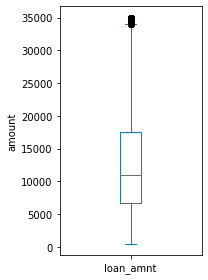

In [34]:
ax = (df['loan_amnt']).plot.box(figsize=(3, 4))
ax.set_ylabel('amount')
plt.tight_layout()
plt.show()

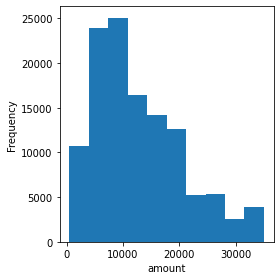

In [35]:
ax = (df['loan_amnt']).plot.hist(figsize=(4, 4))
ax.set_xlabel('amount')
plt.tight_layout()
plt.show()

In [72]:
objects=df.select_dtypes(object)
list(objects.columns)

[]

In [52]:
tmp_features = ['status','term','purpose','home_ownership','outcome', 'purpose_','home_','emp_len_']
for f in tmp_features:
    df[f] = df[f].astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119987 entries, 0 to 119986
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   status             119987 non-null  category
 1   loan_amnt          119987 non-null  int64   
 2   term               119987 non-null  category
 3   annual_inc         119987 non-null  int64   
 4   dti                119987 non-null  float64 
 5   payment_inc_ratio  119987 non-null  float64 
 6   revol_bal          119987 non-null  float64 
 7   revol_util         119987 non-null  float64 
 8   purpose            119987 non-null  category
 9   home_ownership     119987 non-null  category
 10  delinq_2yrs_zero   119987 non-null  int64   
 11  pub_rec_zero       119987 non-null  int64   
 12  open_acc           119987 non-null  int64   
 13  grade              119987 non-null  float64 
 14  outcome            119987 non-null  category
 15  emp_length         119987 non-null

c:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


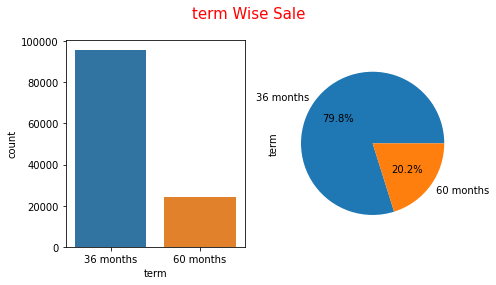

In [75]:
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,4))
    f.suptitle(d.name+' Wise Sale',fontsize=15,color='red')
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
    plt.show()
plot_uni_cat(df["term"])

c:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


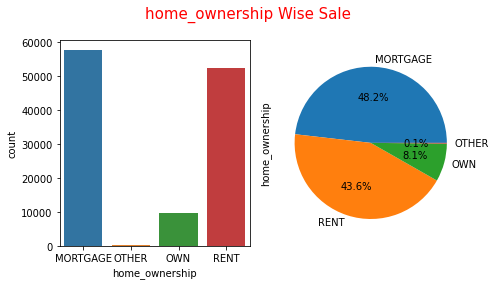

In [58]:
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,4))
    f.suptitle(d.name+' Wise Sale',fontsize=15,color='red')
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
    plt.show()
plot_uni_cat(df["home_ownership"])

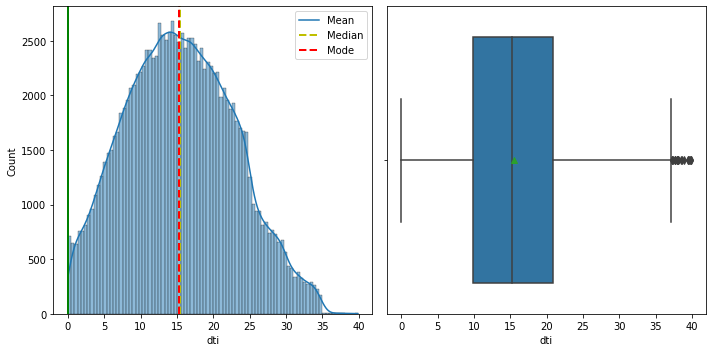

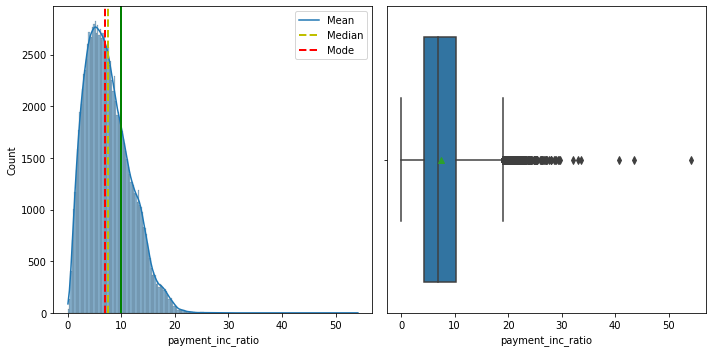

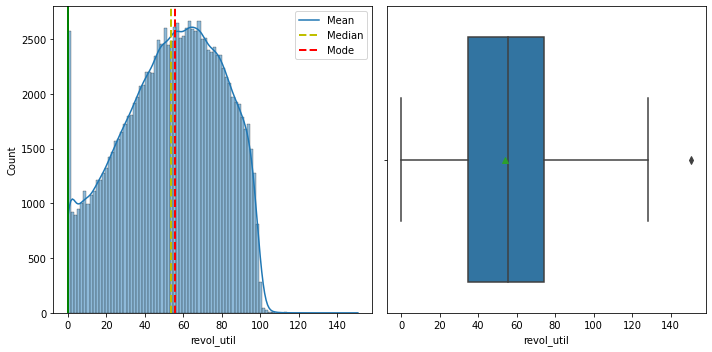

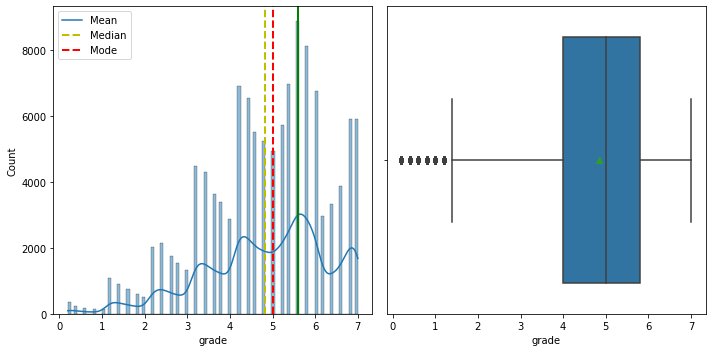

In [73]:
def plot_uni(d):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--', linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0], color='g', linestyle='solid', linewidth=2)
    ax[0].legend({'Mean': d.mean(), 'Median': d.median(), 'Mode': d.mode()})
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()
    plt.show()
num_cols = df[['dti', 'payment_inc_ratio', 'revol_util', 'grade']].columns.values
for col in num_cols:
    plot_uni(df[col])

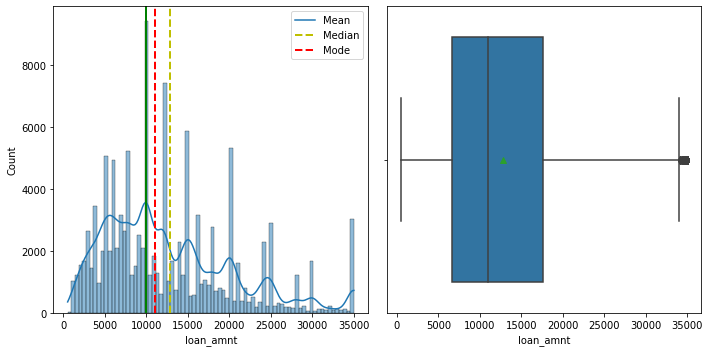

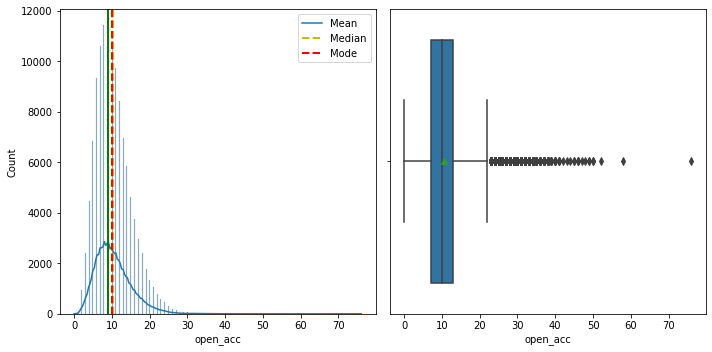

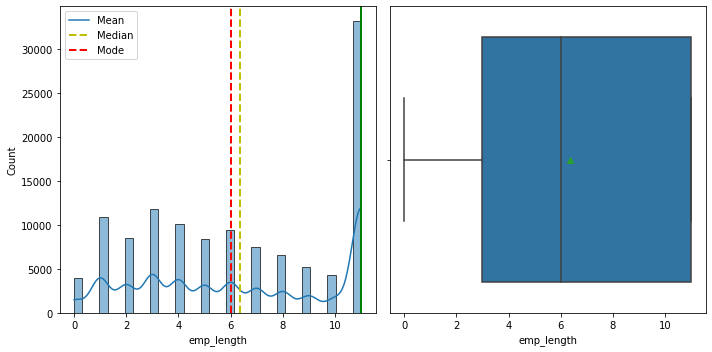

In [69]:
num_cols = df[["loan_amnt","open_acc","emp_length"]].columns.values
for col in num_cols:
    plot_uni(df[col])